# **Students Habits Vs Performance (Exploratory Data Analysis)**

# **Prepared by**:

#  Vashishth Raval




In [5]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
#bring in the data on board
df = pd.read_csv('student_habits_performance.csv')



---



# 1. Overview of the Dataset

In [7]:
#Check the rows and columns randomly
df.sample(3)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
827,S1827,18,Female,4.3,2.6,1.2,No,71.0,8.5,Good,5,Bachelor,Average,9,No,87.5
943,S1943,21,Male,5.2,3.8,2.8,No,88.2,4.5,Good,2,High School,Poor,3,No,72.0
485,S1485,22,Female,4.1,1.6,0.6,No,73.1,5.5,Fair,5,High School,Good,1,No,77.5


In [8]:
#Check the shapes
df.shape

(1000, 16)

In [9]:
#Check the Non-null count and Data types of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [10]:
#Check the null/missing values
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [11]:
#get the descriptive stats of the data
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000




---



# 2. Filling Missing Values

- As you can see, "**parental_education_level**" has **91** missing values and its a **categotical column**. so first check what are numbers of unique values are there in the column and then we will replace it with the **`Mode`**.

In [12]:
#Describing the column
df['parental_education_level'].describe()

count            1000
unique              4
top       High School
freq              392
Name: parental_education_level, dtype: object

In [13]:
#Checking values counts of each category
df['parental_education_level'].value_counts()

High School    392
Bachelor       350
Master         167
None            91
Name: parental_education_level, dtype: int64

In [14]:
#Checking value counts in terms of percentages
df['parental_education_level'].value_counts(normalize=True)*100

High School    39.2
Bachelor       35.0
Master         16.7
None            9.1
Name: parental_education_level, dtype: float64

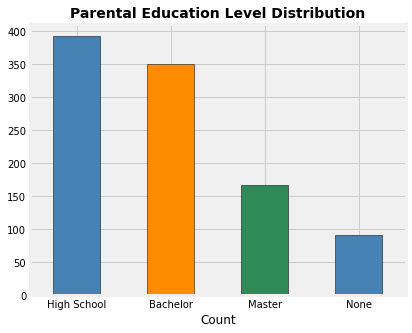

In [15]:
#Plotting bar chart to show the difference
plt.figure(figsize=(6,5))
df['parental_education_level'].value_counts().plot.bar(color=['steelblue','darkorange','seagreen'],edgecolor="black")
plt.title('Parental Education Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [16]:
#Filling the missing values with the Mode which is "High School"
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [17]:
#Checing the missing values
df['parental_education_level'].isna().sum()

0



---



# 3. Checking Duplicate Rows
droping student_id as there are no duplicate values and it not adding any value

In [18]:
df.duplicated().any()

False

In [19]:
df['student_id'].describe()

count      1000
unique     1000
top       S1000
freq          1
Name: student_id, dtype: object

In [20]:
df.drop('student_id',axis=1,inplace=True)

In [21]:
df.head(1)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2


# 4. Analysing The Features

Age -> Continues Feature (Univariate)

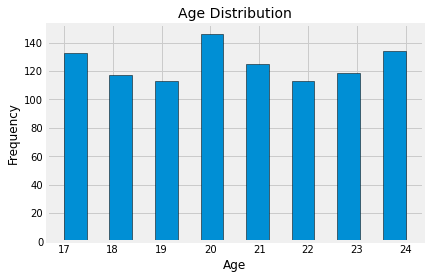

In [22]:
df['age'].hist(bins=15, edgecolor='black', figsize=(6,4))
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.show()

Gender-> Categotical Feature (Univariate)

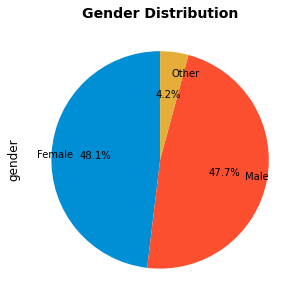

In [24]:
plt.figure(figsize=(6,5))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,labeldistance=0.80)
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.show()

Part-Time Job -> Categotical Feature (Univariate)

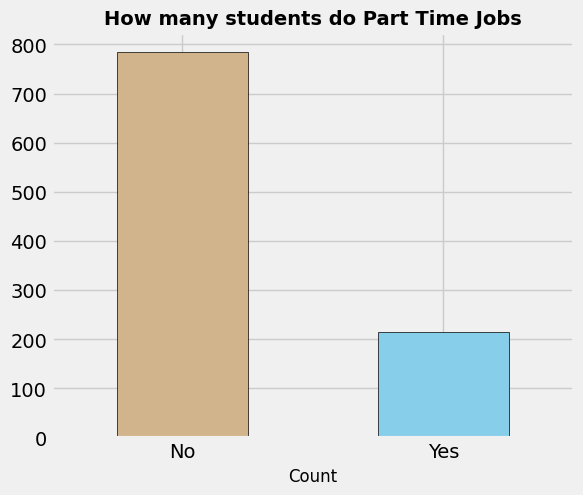

In [ ]:
plt.figure(figsize=(6,5))
df['part_time_job'].value_counts().plot.bar(color=['Tan','SkyBlue'],edgecolor="black")
plt.title('How many students do Part Time Jobs', fontsize=14, fontweight='bold')
plt.xlabel('Part Time Job (No/Yes)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Marks -> Continues Feature (Univariate)

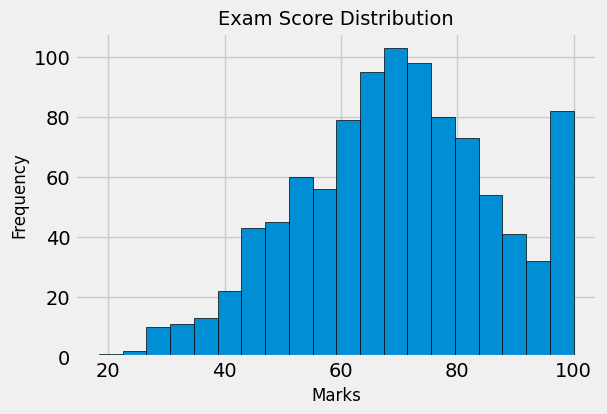

In [ ]:
df['exam_score'].hist(bins=20, edgecolor='black', figsize=(6,4))
plt.title("Exam Score Distribution", fontsize=14)
plt.xlabel("Marks",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.show()

Diet -> Categotical Feature (Univariate)

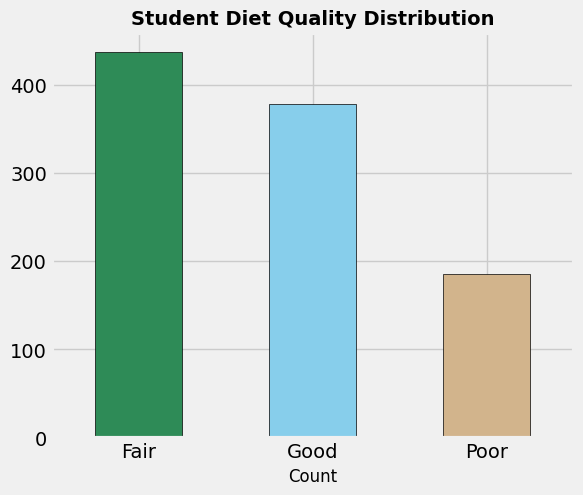

In [ ]:
plt.figure(figsize=(6,5))
df['diet_quality'].value_counts().plot.bar(color=['seagreen','SkyBlue','Tan'],edgecolor="black")
plt.title('Student Diet Quality Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diet Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Study vs Marks Scatter Plot (Bivariate)

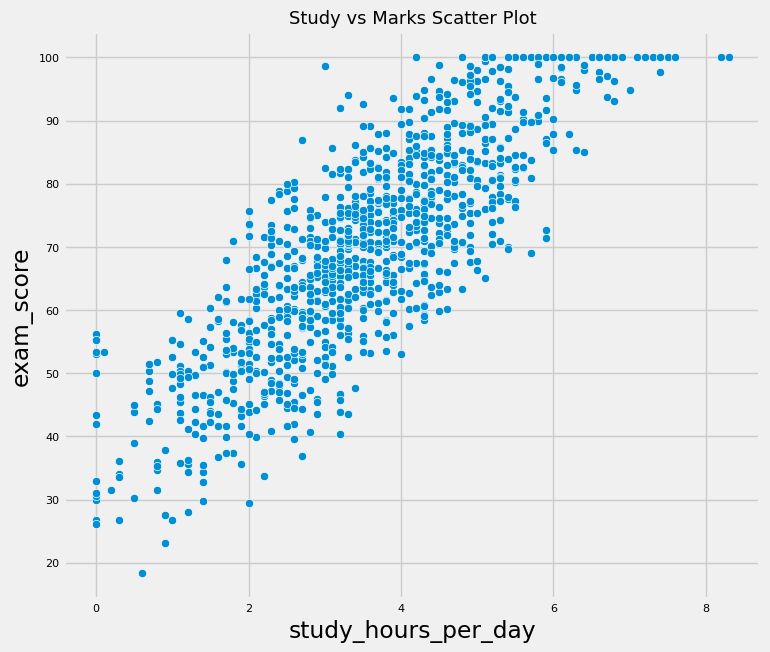

In [ ]:
plt.figure(figsize=(8,7))
sns.scatterplot(df, x='study_hours_per_day', y='exam_score')
plt.title("Study vs Marks Scatter Plot",fontsize=13)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Correlation matrix of numeric features

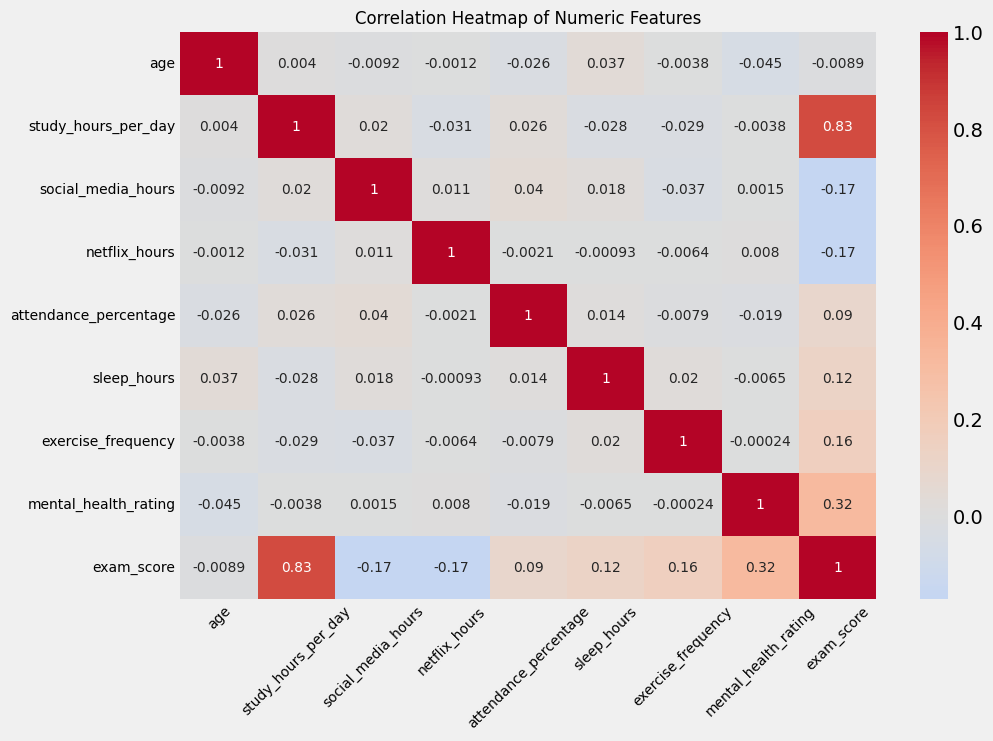

In [ ]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,annot_kws={"fontsize": 10})
plt.title("Correlation Heatmap of Numeric Features",fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

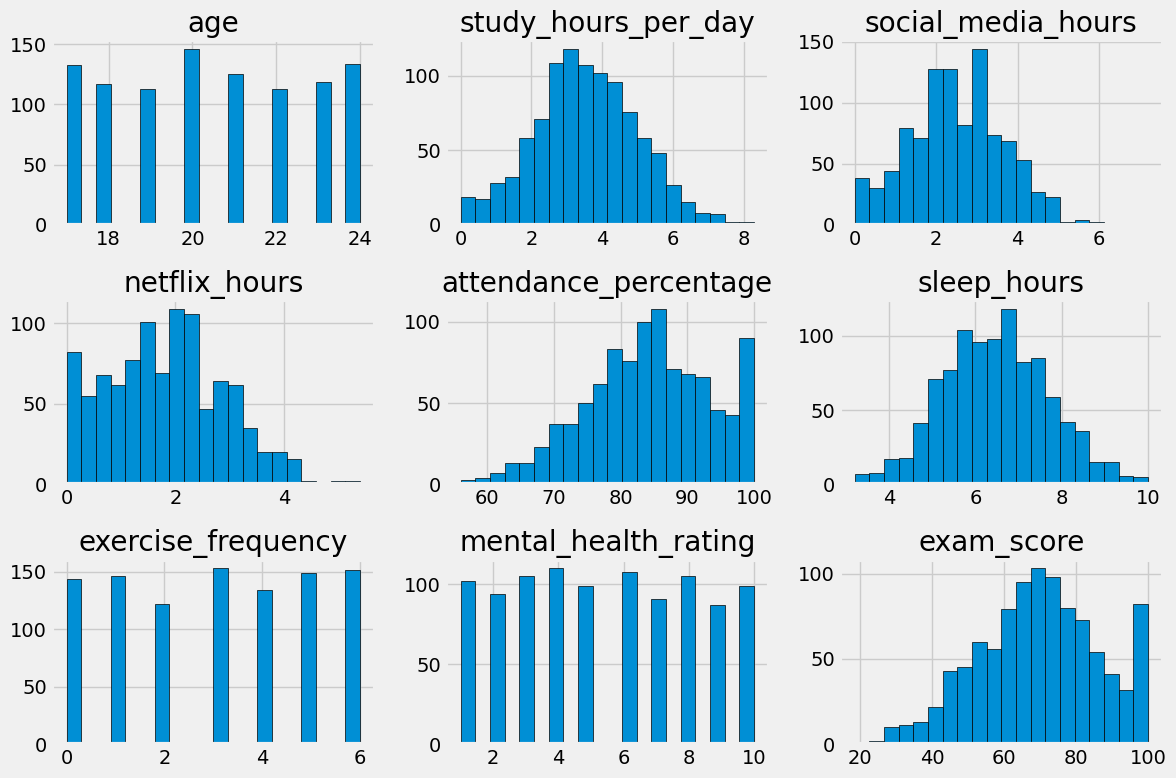

In [ ]:
#Created histogram for checking distribution for all numeric columns
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

# 5. Outliers Detection

Finding the counts of outliers in the dataset from IQR Method

In [ ]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

outlier_indices = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_indices[col] = outliers.index.tolist()

    print(f"{col}: {len(outliers)} outliers")


age: 0 outliers
study_hours_per_day: 7 outliers
social_media_hours: 5 outliers
netflix_hours: 4 outliers
attendance_percentage: 3 outliers
sleep_hours: 2 outliers
exercise_frequency: 0 outliers
mental_health_rating: 0 outliers
exam_score: 2 outliers


Checking the outliers

In [ ]:
#Study hours per day
print(df.loc[outlier_indices['study_hours_per_day']]['study_hours_per_day'])

73     7.4
293    7.4
455    8.3
489    7.4
774    7.5
797    8.2
875    7.6
Name: study_hours_per_day, dtype: float64


In [ ]:
#social_media_hours
print(df.loc[outlier_indices['social_media_hours']]['social_media_hours'])

145    6.2
346    6.0
361    6.1
641    5.7
735    7.2
Name: social_media_hours, dtype: float64


In [ ]:
#netflix_hours
print(df.loc[outlier_indices['netflix_hours']]['netflix_hours'])

81     5.0
556    5.4
822    5.3
887    4.9
Name: netflix_hours, dtype: float64


In [ ]:
#attendance_percentage
print(df.loc[outlier_indices['attendance_percentage']]['attendance_percentage'])

651    57.6
706    56.7
971    56.0
Name: attendance_percentage, dtype: float64


In [ ]:
#sleep_hours
print(df.loc[outlier_indices['sleep_hours']]['sleep_hours'])

802    10.0
955    10.0
Name: sleep_hours, dtype: float64


In [ ]:
#exam_score
print(df.loc[outlier_indices['exam_score']]['exam_score'])

265    18.4
327    23.1
Name: exam_score, dtype: float64


**Conclusion:** Since the detected outliers are realistic and plausible, they should be retained. They may capture rare but important cases, such as extreme behaviors.



---



# 6. Feature Engineering

gender (Nominal: One-Hot Encoding)

In [ ]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [ ]:
df.head(2)

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Male,gender_Other
0,23,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,False,False
1,20,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,False,False


extracurricular_participation (Nominal: One-Hot Encoding)

In [ ]:
df = pd.get_dummies(df, columns=['extracurricular_participation'], drop_first=True)

In [ ]:
df.head(2)

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,56.2,False,False,True
1,20,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,100.0,False,False,False


part_time_job (Nominal: Binary Encoding)

In [ ]:
df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})

In [ ]:
df.sample(2)

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,extracurricular_participation_Yes
128,20,1.8,1.8,1.1,0,92.4,6.7,Good,0,High School,Good,2,48.7,True,False,False
120,24,3.7,0.4,0.9,0,92.1,6.6,Fair,6,Bachelor,Average,6,87.9,True,False,False


diet_quality (Ordinal: Ordinal Encoding)

In [ ]:
mapping = {'Poor': 0, 'Fair': 1, 'Good': 2}
df['diet_quality'] = df['diet_quality'].map(mapping)

In [ ]:
df.sample(2)

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,extracurricular_participation_Yes
394,19,3.2,1.5,0.0,0,79.6,8.1,2,5,Bachelor,Good,10,92.0,False,False,False
288,17,5.4,1.6,1.4,0,100.0,7.1,1,3,High School,Average,5,95.5,True,False,False


internet_quality (Ordinal: Ordinal Encoding)

In [ ]:
mapping = {'Poor': 0, 'Average': 1, 'Good': 2}
df['internet_quality'] = df['internet_quality'].map(mapping)

In [ ]:
df.sample(2)

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,extracurricular_participation_Yes
542,19,4.5,4.9,0.8,0,80.2,6.2,2,1,Bachelor,0,8,72.2,True,False,False
985,18,5.7,3.1,0.0,1,86.6,5.7,1,2,Master,2,3,80.9,True,False,True


parental_education_level (Ordinal: Ordinal Encoding)

In [ ]:
mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2}
df['parental_education_level'] = df['parental_education_level'].map(mapping)

In [ ]:
df.sample(2)

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,extracurricular_participation_Yes
704,21,5.5,3.0,1.4,0,92.9,5.2,1,6,0,2,2,76.3,False,False,True
473,20,5.0,2.9,2.6,0,96.2,6.7,0,6,0,1,5,80.6,True,False,False


**Final Data after Encoding**

In [ ]:
df.sample(5)

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Male,gender_Other,extracurricular_participation_Yes
476,17,2.1,2.7,1.4,0,77.4,4.3,2,5,2,2,4,39.9,False,False,True
631,20,3.7,1.8,1.3,0,91.9,6.3,1,6,2,2,10,80.9,False,False,False
66,20,3.6,4.2,0.9,0,67.0,5.4,2,4,1,1,8,66.5,True,False,False
384,21,2.6,5.4,3.3,0,87.2,8.0,2,1,0,0,9,59.8,False,False,False
916,18,4.4,3.4,1.4,0,91.1,6.5,2,1,0,2,7,69.1,True,False,False


In [ ]:
df.shape

(1000, 16)

# 7. Min-Max Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

In [ ]:
# Fit and transform
df = scaler.fit_transform(df)

# Convert back to DataFrame with same column names + original index
df_scaled = pd.DataFrame(df)

In [ ]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.857143,0.000000,0.166667,0.203704,0.0,0.659091,0.705882,0.5,1.000000,1.0,0.5,0.777778,0.463235,0.0,0.0,1.0
1,0.428571,0.831325,0.388889,0.425926,0.0,0.938636,0.205882,1.0,1.000000,0.0,0.5,0.777778,1.000000,0.0,0.0,0.0
2,0.571429,0.168675,0.430556,0.240741,0.0,0.881818,0.705882,0.0,0.166667,0.0,0.0,0.000000,0.194853,1.0,0.0,0.0
3,0.857143,0.120482,0.541667,0.185185,0.0,0.340909,0.882353,0.0,0.666667,1.0,1.0,0.000000,0.102941,0.0,0.0,1.0
4,0.285714,0.602410,0.611111,0.092593,0.0,0.793182,0.250000,0.5,0.500000,1.0,1.0,0.000000,0.588235,0.0,0.0,0.0


# 8. Train Test Split

In [ ]:
#renaming columns for better understanding
df_scaled.columns=['age', 'study_hours', 'social_media_hours', 'netflix_hours',
       'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'exam_score', 'gender_Male', 'gender_Other',
       'extracurricular_participation_Yes']

In [ ]:
#Creating X_set bt Droping target column
x = df_scaled.drop('exam_score', axis=1)
x.head()

,age,study_hours,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,gender_Male,gender_Other,extracurricular_participation_Yes
0,0.857143,0.000000,0.166667,0.203704,0.0,0.659091,0.705882,0.5,1.000000,1.0,0.5,0.777778,0.0,0.0,1.0
1,0.428571,0.831325,0.388889,0.425926,0.0,0.938636,0.205882,1.0,1.000000,0.0,0.5,0.777778,0.0,0.0,0.0
2,0.571429,0.168675,0.430556,0.240741,0.0,0.881818,0.705882,0.0,0.166667,0.0,0.0,0.000000,1.0,0.0,0.0
3,0.857143,0.120482,0.541667,0.185185,0.0,0.340909,0.882353,0.0,0.666667,1.0,1.0,0.000000,0.0,0.0,1.0
4,0.285714,0.602410,0.611111,0.092593,0.0,0.793182,0.250000,0.5,0.500000,1.0,1.0,0.000000,0.0,0.0,0.0


In [ ]:
#Creating y_set bt Droping target column
y = df_scaled['exam_score']
y.head()

,exam_score
0,0.463235
1,1.000000
2,0.194853
3,0.102941
4,0.588235


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
X_train.head(1)

,age,study_hours,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,gender_Male,gender_Other,extracurricular_participation_Yes
541,0.142857,0.506024,0.527778,0.62963,1.0,0.654545,0.323529,1.0,0.333333,0.0,1.0,0.444444,0.0,0.0,0.0


In [ ]:
y_train.head(1)

,exam_score
541,0.60049
